# This Jupyter notebook contains the instructions for Assessment 2019 for the module Fundamentals of Data Analysis 2019

GMIT H.Dip Data Analytics - Academic Year 2019 - 2020


##### Student: Henk Tjalsma


##### GMIT email address: G00376321@gmit.ie

## Problem statement

> This assessment concerns the well-known tips [6] dataset and the Python [1] packages seaborn [5] and jupyter [4]. The project is broken into three parts, as follows:

Description:

* Create a git repository and make it available online for the lecturer to clone. The repository should contain all your work for this assessment.
* Within the repository, create a jupyter [4] notebook that uses descriptive statistics and plots to describe the tips [6] dataset. This part is worth 30% of your overall mark.

Regression:

* To the above jupyter notebook add a section that discusses and analyses whether there is a relationship between the total bill and tip amount, and this part is also worth 30%.

Analyse:

* Again using the same notebook, analyse the relationship between the variables within the dataset. You are free to interpret this as you wish — for example, you may analyse all pairs of variables, or select a subset and analyse those.

## Tips Dataset - what does it contain?

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair treatment of the servers, for whom tips (at least in restaurants in the United States) are a major component of pay. In one restaurant, a food server recorded the following data on all customers they served during an interval of two and a half months in early 1990. The restaurant, located in a suburban shopping mall, was part of a national chain and served a varied menu. In observance of local law, the restaurant offered to seat in a non-smoking section to patrons who requested it. Each record includes a day and time, and taken together, they show the server’s work schedule. [16]

##### Columns:

> total_bill : Total bill (cost of the meal), including tax, in US dollars

> tip : Tip (gratuity) in US dollars

> sex : Sex of person paying for the meal (0=male, 1=female)

> smoker : Smoker in party? (0=No, 1=Yes)

> day : 3=Thur, 4=Fri, 5=Sat, 6=Sun

> time : 0=Day, 1=Night

> size : Size of the party (between 1 and 6)

In [1]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
# Loading the .csv file into a Pandas DataFrame
tips = pd.read_csv('tips.csv', delimiter = ',')

In [24]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


The tips.head command showed us that for this tips data set, the columns sex, smoker, day and time are categorical data. And total_bill, tip, and size are numerical data. [17]

Each entry or row captures a type of customer (be it male or female or smoker or non-smoker ) having either dinner or lunch on a particular day of the week. It also captures the amount of total bill, the tip given and the table size of a customer. [20]

## 1. Description:

* Create a git repository and make it available online for the lecturer to clone. The repository should contain all your work for this assessment.

* Within the repository, create a jupyter [4] notebook that uses descriptive statistics and plots to describe the tips [6] dataset. 

In [3]:
# Describing first 5 columns
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
# Get the shape of the dataset - number of rows and columns
tips.shape

(244, 7)

In [5]:
# Describe the data (numbers) in the dataset
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


The describe command allowed us to retrieve some common information such as min, max, unique and count for given numerical data.

* These are a few statistics that give some perspective on the nature of the distribution of the data [18]:
    - mean is the average and is the "expected" value of the distribution. On average, you'd expect to get this number.
    - std -> standard deviation -> it’s a measure of how far away from the mean values you’re typically are -> standard deviation is giving you sort of an indication of the spread away from the mean that those values are.    
    - 50% -> median, that is the value for which half of the values are above it, and half of them are below it.
    - 25% & 75% give perspective on the kurtosis. Also, all percentile numbers are generally more robust to outliers. 25% -> is the value for which 25% of the values in your data set, for the variable, are below that. 75% -> is the one for which 75% of the values in your data set, for the variable, are below it.
    - min, max, max - min, 75% - 25% are all alternatives to perspectives on how big of swings the data takes relative to the mean.
    - count, the larger this number, the more credibility all the stats have.

In [6]:
# Checking missing values (isnull method) in the tips dataset
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

##### Univariate plots

These plots are based on a single variable and show the frequency of unique values of a given variable. In below example, there is just the tip amount.

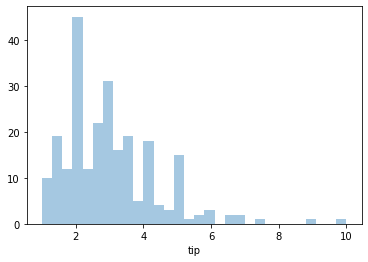

In [7]:
sns.distplot(tips['tip'], kde=False, bins=30);

If you increase the number of bins, the more accurate the result will be.

We can see that the count of the different tip values present in the dataset implies that most of the tips are between 2 and 3.

##### Kerner Density Estimate (KDE)

KDE is a way to estimate the probability density function of a continuous random variable. It is used when you need to know the distribution of the variable.

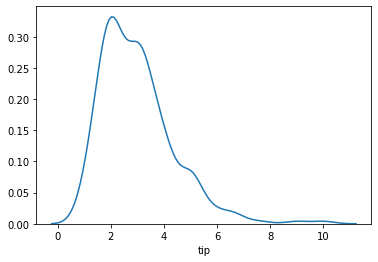

In [8]:
sns.distplot(tips['tip'],hist=False, bins=10);

In [20]:
corr_matrix = tips.corr()

In [21]:
corr_matrix

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


## 2. Regression:

* To the above jupyter notebook add a section that discusses and analyses whether there is a relationship between the total bill and tip amount.

In [25]:
# Checking missing values (isnull method) in the tips dataset
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

The above we already executed previously. This indicates that we have no missing tip values. So it seems all customers who were in this restaurant on each of those days Thursday till Sunday, left a tip amount when paying for the bill.

##### Bivariate Plots

This type of plots is used when you need to find a relation between two variables and how the value of one variable changes the value of another variable. Different types of plots are used based on the data type of the variable.

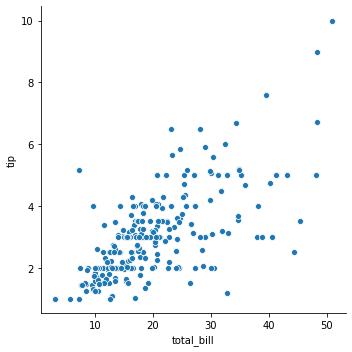

In [11]:
sns.relplot(x="total_bill", y="tip", data=tips);

The default plot type of relplot is scatterplot. It shows the relationship between two variables. So, if you need to find the correlation between two variables scatterplot can be used.

In above example, you can see there is a high concentration of tip data points around 10-20 bill payment, but in below jointplot, it gives a much clearer picture. The very dark regions are the highest concentration. We can see that if total bill is between 10–20 than the tip will be slightly below 2 dollars and up to 3 dollars.

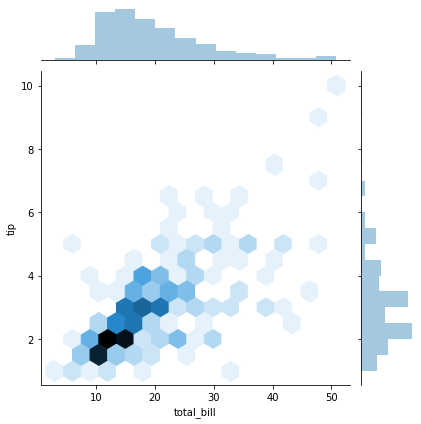

In [12]:
# In below the very dark region is the highest concentration
sns.jointplot(x = 'total_bill', y = 'tip', data = tips ,kind = 'hex')

We can add a third variable also in scatterplot using different colors or shape of dots.

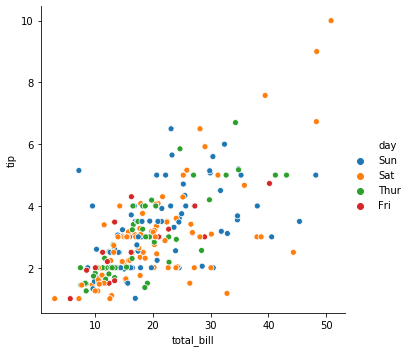

In [13]:
sns.relplot(x="total_bill", y="tip", hue="day", data=tips);

## 3. Analysis:

* Again using the same notebook, analyse the relationship between the variables within the dataset. You are free to interpret this as you wish — for example, you may analyse all pairs of variables, or select a subset and analyse those.

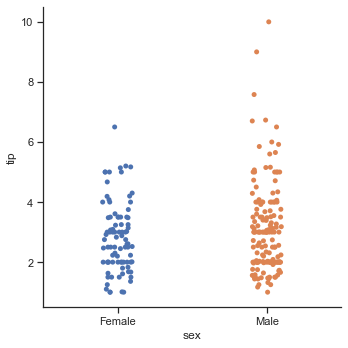

In [22]:
# Categorical data types - Scatterplot
sns.catplot(x="sex", y="tip", data=tips);

In above, we can see that most of the tips are concentrated between 2 and 4 irrespective of the gender.

Different types of scatterplots can be made using attribute kind in seaborn.

The third variable can be used using attribute hue in seaborn.

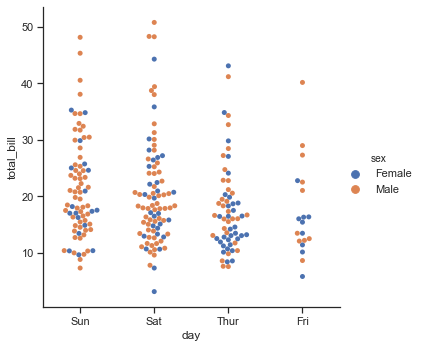

In [27]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips);

The categories to be represented on the x-axis are sorted as per the pandas categories. If you want to change the order of it you can use order attribute in seaborn.

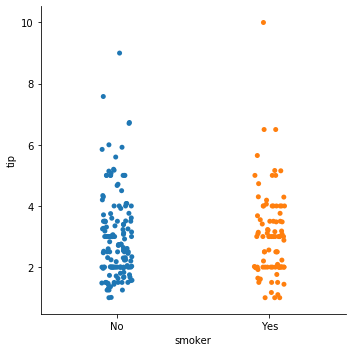

In [16]:
sns.catplot(x="smoker", y="tip", order=["No", "Yes"], data=tips);

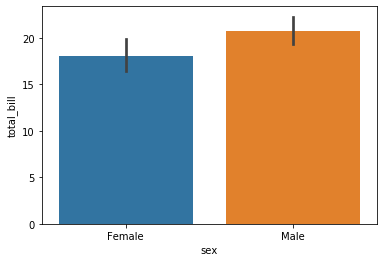

In [17]:
# Below plot shows most bills are paid by the male compared to the female
sns.barplot(x = 'sex', y ='total_bill', data = tips)

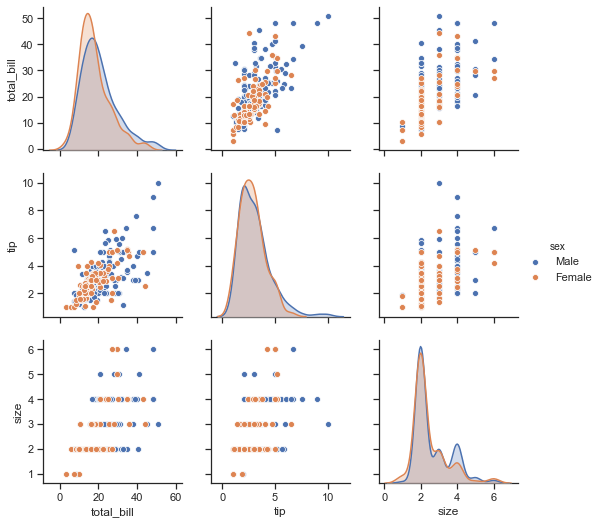

In [18]:
sns.set(style="ticks")

df = sns.load_dataset("tips")
sns.pairplot(df, hue="sex")

For data scientists, checking correlations is an important part of the exploratory data analysis process. This analysis is one of the methods used to decide which features affect the target variable the most, and in turn, get used in predicting this target variable. In other words, it’s a commonly-used method for feature selection in machine learning.

And because visualization is generally easier to understand than reading tabular data, heatmaps are typically used to visualize correlation matrices. A simple way to plot a heatmap in Python is by importing and implementing the Seaborn library. 

Seaborn heatmaps are appealing to the eyes, and they tend to send clear messages about data almost immediately. This is why this method for correlation matrix visualization is widely used by data analysts and data scientists alike.

But what else can we get from the heatmap apart from a simple plot of the correlation matrix?

In two words: A LOT.

Surprisingly, the Seaborn heatmap function has 18 arguments that can be used to customize a correlation matrix, improving how fast insights can be derived. For the purposes of this tutorial, we’re going to use 13 of those arguments. [20]

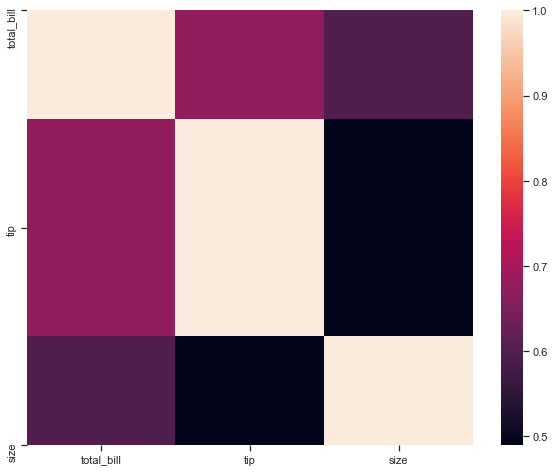

In [33]:
# Doing a basic correlation matrix of your data frame
plt.subplots(figsize=(10,8))
sns.heatmap(tips.corr())

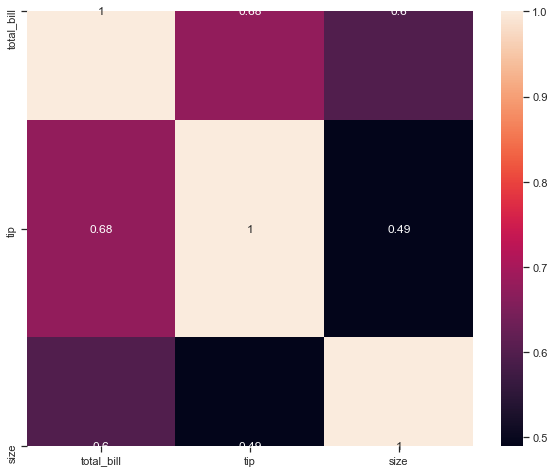

In [34]:
# And using the annotation argument
plt.subplots(figsize=(10,8))
sns.heatmap(tips.corr(), annot=True)

## References

[1] Python Software Foundation. Welcome to python.org.
https://www.python.org/.

[2] GMIT. Quality assurance framework.
https://www.gmit.ie/general/quality-assurance-framework.

[3] GitHub Guides. Mastering markdown.
https://guides.github.com/features/mastering-markdown/.

[4] Project Jupyter. Project jupyter.
https://jupyter.org/.

[5] Michael Waskom. seaborn.
https://seaborn.pydata.org/.

[6] Michael Waskom. Tips data set.
https://github.com/mwaskom/seaborn-data/blob/master/tips.csv.

[7] Seaborn

https://anaconda.org/anaconda/seaborn

[8] Anaconda

https://docs.anaconda.com/anaconda/

[9] Python

https://www.python.org/downloads/

[10] Cmder software

https://cmder.net/

[11] https://stackoverflow.com/questions/30336324/seaborn-load-dataset

[12] https://stackoverflow.com/questions/43422692/loading-web-data-file-to-pandas-dataframe

[13] https://data36.com/pandas-tutorial-1-basics-reading-data-files-dataframes-data-selection/

[14] https://www.kaggle.com/ssouhassou/data-viz-a-modest-essay-on-the-dataset-tips

[15] https://www.kaggle.com/ranjeetjain3/different-types-of-charts

[16] https://www.kaggle.com/ranjeetjain3/seaborn-tips-dataset

[17] https://towardsdatascience.com/analyze-the-data-through-data-visualization-using-seaborn-255e1cd3948e

[18] https://stackoverflow.com/questions/36964155/what-is-the-statistical-significance-of-pandas-describe-function-and-how-to-use

[19] https://stackoverflow.com/questions/31726643/how-do-i-get-multiple-subplots-in-matplotlib

[20] https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07

[21] https://datascience.stackexchange.com/questions/17540/make-seaborn-heatmap-bigger